<div style="border:solid Chocolate 2px; padding: 40px">

<b>Глеб,
привет!👋</b>

Меня зовут Александр Куимов, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
 Молодец, что собираешь импорты в одну ячейку и помещаешь ее в начале проекта!

In [2]:
data=pd.read_csv('/datasets/autos.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [3]:
def check_data (data_i):
    temp = data_i.copy() 
    # проверяем дубликаты
    print('Кол-во дубликатов:',temp.duplicated().sum())
    list_c=data_i.columns
    for col_l in list_c:
        print('-------------------------')
        #print(col_l, temp[col_l].sort_values().unique())
        print(col_l,'|кол-во строк',len(temp),'| кол-во NaN',temp[col_l].isna().sum(),
        '| процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

In [4]:
check_data (data)

Кол-во дубликатов: 4
-------------------------
DateCrawled |кол-во строк 354369 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
Price |кол-во строк 354369 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
VehicleType |кол-во строк 354369 | кол-во NaN 37490 | процент NaN 10.58 %
-------------------------
RegistrationYear |кол-во строк 354369 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
Gearbox |кол-во строк 354369 | кол-во NaN 19833 | процент NaN 5.6 %
-------------------------
Power |кол-во строк 354369 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
Model |кол-во строк 354369 | кол-во NaN 19705 | процент NaN 5.56 %
-------------------------
Kilometer |кол-во строк 354369 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
RegistrationMonth |кол-во строк 354369 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
FuelType |кол-во строк 354369 | кол-во NaN 32895 | процент NaN 9.28 %
-------------------------
Brand |ко

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b> 
    
С данными познакомились, первичный аналитический осмотр проведен. Полученная информация поможет нам в дальнейшем с предобработкой данных. 
</div>

In [5]:
print(data['NotRepaired'].sort_values().unique())

['no' 'yes' nan]


In [6]:
data['NotRepaired']=data['NotRepaired'].fillna('no')

In [7]:
print(data['NotRepaired'].sort_values().unique())

['no' 'yes']


In [8]:
print(data['FuelType'].sort_values().unique())

['cng' 'electric' 'gasoline' 'hybrid' 'lpg' 'other' 'petrol' nan]


In [9]:
data['FuelType']=data['FuelType'].fillna('other')

In [10]:
print(data['VehicleType'].sort_values().unique())

['bus' 'convertible' 'coupe' 'other' 'sedan' 'small' 'suv' 'wagon' nan]


In [11]:
data['VehicleType']=data['VehicleType'].fillna('other')

In [12]:
print(data['Model'].sort_values().unique())

['100' '145' '147' '156' '159' '1_reihe' '1er' '200' '2_reihe' '300c'
 '3_reihe' '3er' '4_reihe' '500' '5_reihe' '5er' '601' '6_reihe' '6er'
 '7er' '80' '850' '90' '900' '9000' '911' 'a1' 'a2' 'a3' 'a4' 'a5' 'a6'
 'a8' 'a_klasse' 'accord' 'agila' 'alhambra' 'almera' 'altea' 'amarok'
 'antara' 'arosa' 'astra' 'auris' 'avensis' 'aveo' 'aygo' 'b_klasse'
 'b_max' 'beetle' 'berlingo' 'bora' 'boxster' 'bravo' 'c1' 'c2' 'c3' 'c4'
 'c5' 'c_klasse' 'c_max' 'c_reihe' 'caddy' 'calibra' 'captiva' 'carisma'
 'carnival' 'cayenne' 'cc' 'ceed' 'charade' 'cherokee' 'citigo' 'civic'
 'cl' 'clio' 'clk' 'clubman' 'colt' 'combo' 'cooper' 'cordoba' 'corolla'
 'corsa' 'cr_reihe' 'croma' 'crossfire' 'cuore' 'cx_reihe' 'defender'
 'delta' 'discovery' 'doblo' 'ducato' 'duster' 'e_klasse' 'elefantino'
 'eos' 'escort' 'espace' 'exeo' 'fabia' 'fiesta' 'focus' 'forester'
 'forfour' 'fortwo' 'fox' 'freelander' 'fusion' 'g_klasse' 'galant'
 'galaxy' 'getz' 'gl' 'glk' 'golf' 'grand' 'i3' 'i_reihe' 'ibiza'
 'impreza' '

In [13]:
data['Model']=data['Model'].fillna('other')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:  </b>
        
Допустимый способ заполнения пропусков. Молодец, что используешь заглушки.

In [14]:
print(data['Gearbox'].sort_values().unique())


['auto' 'manual' nan]


2000.0
119.03386293183567
1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f195f6a4100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f195f6a47c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f195f689d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f195f6a4e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f195f6af220>],
 'means': []}

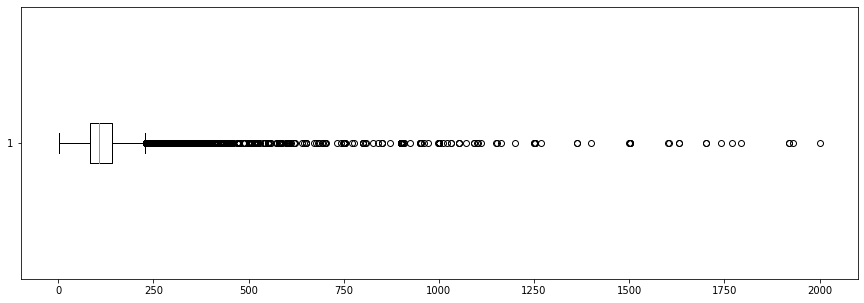

In [15]:

data['Power']= np.where(data['Power']>1000, data['Power']/10, data['Power'])
data['Power']= np.where(data['Power']==0, data['Power'].mean(), data['Power'])
print(data['Power'].max())
print(data['Power'].mean())
print(data['Power'].min())
plt.figure(figsize=(15, 5))
plt.boxplot(x=data['Power'] ,vert=0)

In [16]:
data=data[data['Power']<250]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346339 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DateCrawled        346339 non-null  object 
 1   Price              346339 non-null  int64  
 2   VehicleType        346339 non-null  object 
 3   RegistrationYear   346339 non-null  int64  
 4   Gearbox            326632 non-null  object 
 5   Power              346339 non-null  float64
 6   Model              346339 non-null  object 
 7   Kilometer          346339 non-null  int64  
 8   RegistrationMonth  346339 non-null  int64  
 9   FuelType           346339 non-null  object 
 10  Brand              346339 non-null  object 
 11  NotRepaired        346339 non-null  object 
 12  DateCreated        346339 non-null  object 
 13  NumberOfPictures   346339 non-null  int64  
 14  PostalCode         346339 non-null  int64  
 15  LastSeen           346339 non-null  object 
dtypes:

    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

* Для столбца 'Power' предположил, что значения больше 1000 это ошибка заполняющего и позволил  разделить  данные значения на 10 ( вместо 2500 представить данные как 250 л.с., что  кажется боллее правдоподобно)  
* Обрабатывая значения 0 заменил его на среднее,  так как скорей всего  данные были не заполнены.  
* По Усам определи границу выбросов, решил  оставить все значения ниже 250 л.с.
    
</div> 

 <div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

20000.0
4403.774218882788
1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f195f58b4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f195f58bb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f195f58b160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f195f592280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f195f5925e0>],
 'means': []}

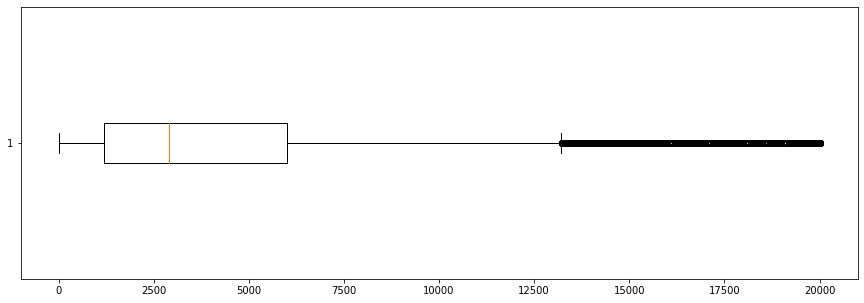

In [17]:

#data['Price']= np.where(data['']>1000, data['Power']/10, data['Power'])
data['Price']= np.where(data['Price']==0, data['Price'].mean(), data['Price'])
print(data['Price'].max())
print(data['Price'].mean())
print(data['Price'].min())
plt.figure(figsize=(15, 5))
plt.boxplot(x=data['Price'] ,vert=0)

In [18]:
data=data[data['Price']<13000]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323946 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DateCrawled        323946 non-null  object 
 1   Price              323946 non-null  float64
 2   VehicleType        323946 non-null  object 
 3   RegistrationYear   323946 non-null  int64  
 4   Gearbox            304592 non-null  object 
 5   Power              323946 non-null  float64
 6   Model              323946 non-null  object 
 7   Kilometer          323946 non-null  int64  
 8   RegistrationMonth  323946 non-null  int64  
 9   FuelType           323946 non-null  object 
 10  Brand              323946 non-null  object 
 11  NotRepaired        323946 non-null  object 
 12  DateCreated        323946 non-null  object 
 13  NumberOfPictures   323946 non-null  int64  
 14  PostalCode         323946 non-null  int64  
 15  LastSeen           323946 non-null  object 
dtypes:

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

* Для столбца 'Price' граница верхних выбросов 13000 
* Обрабатывая значения 0 заменил его на среднее,  так как скорей всего  данные были не заполнены.  
* Сократил выборку
    
</div> 

 <div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

2002.1709521779899
1989


{'whiskers': [<matplotlib.lines.Line2D at 0x7f195f55dc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f195f568370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f195f55d910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f195f568a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f195f568d90>],
 'means': []}

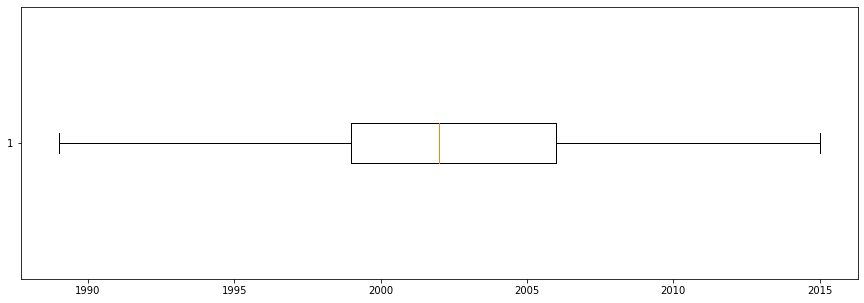

In [19]:

data=data[data['RegistrationYear']<2016]
data=data[data['RegistrationYear']>1988]

print(data['RegistrationYear'].mean())
print(data['RegistrationYear'].min())
plt.figure(figsize=(15, 5))
plt.boxplot(x=data['RegistrationYear'] ,vert=0)

In [20]:
data = data.drop('PostalCode', axis=1)
data = data.drop('LastSeen', axis=1)
data = data.drop('DateCrawled', axis=1)
data = data.drop('DateCreated', axis=1)
data = data.drop('NumberOfPictures', axis=1)



<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Молодец, что замечаешь неважные, константный признаки и удаляешь их.

In [21]:
data.dropna(inplace=True)
print('Кол-во дубликатов:',data.duplicated().sum())
data.drop_duplicates(keep=False, inplace=True)
print('Кол-во дубликатов:',data.duplicated().sum())

Кол-во дубликатов: 24943
Кол-во дубликатов: 0


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Можно было также использовать заглушки для заполнения пропусков в остальных кат. признаках.

In [22]:
%%time
check_data (data)

Кол-во дубликатов: 0
-------------------------
Price |кол-во строк 233186 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
VehicleType |кол-во строк 233186 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
RegistrationYear |кол-во строк 233186 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
Gearbox |кол-во строк 233186 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
Power |кол-во строк 233186 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
Model |кол-во строк 233186 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
Kilometer |кол-во строк 233186 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
RegistrationMonth |кол-во строк 233186 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
FuelType |кол-во строк 233186 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
Brand |кол-во строк 233186 | кол-во NaN 0 | процент NaN 0.0 %
-------------------------
NotRepaired |кол-во строк 233186 | 

In [23]:
data.corr()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
Price,1.000000,0.662624,0.418732,-0.302929,0.082795
RegistrationYear,0.662624,1.000000,0.107489,-0.347565,0.073250
Power,0.418732,0.107489,1.000000,0.174445,0.031673
Kilometer,-0.302929,-0.347565,0.174445,1.000000,-0.012387
RegistrationMonth,0.082795,0.073250,0.031673,-0.012387,1.000000


<b>Выводы:</b>  
В данных присутствовали пропуски:  
* Для столбцов VehicleType, Model, FuelType все пропуски заменены на "other", чтобы не сокращать выборку.  
* Для столбца NotRepaired заменены на "no". Предполагаю что пропуск может означать отсутсвие.
* Пропуски по столбцу Gearbox убрал из выборки, так как определить тип невозможно.

Из выборки убрано 25145 дубликатов.  

Тип данных столбцов соответсвует содержимому и не требует коррекции.  
После обработки выборка сократилась на 33% 


Удалены столбцы 'DateCreated','DateCrawled','NumberOfPictures','PostalCode' и 'LastSeen', так как данные признаки не информативны для модели.

Из матрицы корреляции видно, что наибольшое влияние на Цену оказывает Мощность и Пробег автомобиля.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Проверь, сколько уникальных значений в месяце регистрации, с этим что-то придется сделать.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
- Узнай пожалуйста год выгрузки данных (через макс. значение признака `DateCreated`) и сделай вывод о верхнем диапазоне выбросов.
- Построй ящик с усами, чтобы посмотреть от какого значения начинаются выбросы (нижний диапазон выбросов). Проведи очистку этого признака от аномалий, пожалуйста.
 </div>
    <br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
Данное поле удалено и не требует обработки.
</div> 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
        

В целом, ты прав, но у нас еще есть признак RegistrationYear, там есть "авто из будущего" и слишком старые. Поэтому, год регистрации следует ограничить сверху 2016 годом, а также снизу (по боксплоту). Максимальный год выгрузки - 2016.
  </div>  
<div class="alert alert-info">
<h2> Комментарий студентаv.2: <a class="tocSkip"> </h2>
Убрал все значения лежащие в выбросах по усам.Итоговый период выпуска авто 1988-2016. Для массового сегмента рынка допустимы диапазон.
</div>  

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Супер!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>

Здесь еще предполагается удалить объекты с неккоректными значениями у мощности и цены.
        
Рекомендую построить ящики с усами для корректного отсечения аномалий. 
</div>
    <br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

Внес иправления выше
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Вижу, хорошо.

## Обучение моделей

In [24]:
data_forest=pd.get_dummies(data)
data_forest.head()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_bus,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,...,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_no,NotRepaired_yes
0,480.0,1993,106.899525,150000,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,9800.0,2004,163.000000,125000,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1500.0,2001,75.000000,150000,6,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,3600.0,2008,69.000000,90000,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,650.0,1995,102.000000,150000,10,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Чтобы не создавались лишние признаки при кодировании следует указать в аргументе  `drop='first'`.
 </div>

In [25]:
features_train, features_rem, target_train, target_rem = train_test_split(data_forest.drop('Price', axis=1),data_forest['Price'], train_size=0.6, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_rem,target_rem,  train_size=0.5, random_state=12345)

X_f_train=features_train
X_f_test=features_valid
y_f_train=target_train 
y_f_test=target_valid

print(X_f_train.shape,y_f_train.shape, X_f_test.shape,  y_f_test.shape,features_test.shape,target_test.shape)

(139911, 308) (139911,) (46637, 308) (46637,) (46638, 308) (46638,)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Хорошо, разбиение на выборки корректное.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Не рекомендую тут проводить переименования выборок.
 </div>
    

In [26]:

for est in np.arange(1, 100, 20):
    model = RandomForestRegressor(random_state=12345, n_estimators=est ,max_depth = 10,criterion='mse',n_jobs=-1)
    model.fit(X_f_train, y_f_train)
    y_f_pred = model.predict(X_f_test)
    rmse_test = mean_squared_error(y_f_test, y_f_pred) ** 0.5
    print("max_estimators =",est, ": ", end='')
    print(f'The RMSE of prediction is: {rmse_test}')


max_estimators = 1 : The RMSE of prediction is: 1543.4424388615423
max_estimators = 21 : The RMSE of prediction is: 1453.7944640863975
max_estimators = 41 : The RMSE of prediction is: 1453.0626306851316
max_estimators = 61 : The RMSE of prediction is: 1449.3648652653014
max_estimators = 81 : The RMSE of prediction is: 1449.8702790557284


In [27]:

for est in np.arange(10, 20, 1):
    model = RandomForestRegressor(random_state=12345, n_estimators=est ,max_depth = 10,criterion='mse',n_jobs=-1)
    model.fit(X_f_train, y_f_train)
    y_f_pred = model.predict(X_f_test)
    rmse_test = mean_squared_error(y_f_test, y_f_pred) ** 0.5
    print("max_estimators =",est, ": ", end='')
    print(f'The RMSE of prediction is: {rmse_test}')

max_estimators = 10 : The RMSE of prediction is: 1460.7458987505634
max_estimators = 11 : The RMSE of prediction is: 1457.2774156852763
max_estimators = 12 : The RMSE of prediction is: 1457.141228647171
max_estimators = 13 : The RMSE of prediction is: 1454.6292413484546
max_estimators = 14 : The RMSE of prediction is: 1452.3673621658993
max_estimators = 15 : The RMSE of prediction is: 1453.2972236958076
max_estimators = 16 : The RMSE of prediction is: 1453.2199480768104
max_estimators = 17 : The RMSE of prediction is: 1452.8440894484997
max_estimators = 18 : The RMSE of prediction is: 1452.7689366779607
max_estimators = 19 : The RMSE of prediction is: 1453.1922118337982


<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
Остановимся на минимальном значение в котром достигаеться 1550 . 17 деревьев)
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [28]:
for deph in np.arange(1, 100, 10):
    model = RandomForestRegressor(random_state=12345, n_estimators=17 ,max_depth = deph,criterion='mse',n_jobs=-1)
    model.fit(X_f_train, y_f_train)
    y_f_pred = model.predict(X_f_test)
    rmse_test = mean_squared_error(y_f_test, y_f_pred) ** 0.5
    print("max_depth=",deph, ": ", end='')
    print(f'The RMSE of prediction is: {rmse_test}')

max_depth= 1 : The RMSE of prediction is: 2406.34227006866
max_depth= 11 : The RMSE of prediction is: 1417.858939698044
max_depth= 21 : The RMSE of prediction is: 1321.1378616142358
max_depth= 31 : The RMSE of prediction is: 1344.8261351723918
max_depth= 41 : The RMSE of prediction is: 1355.0588331791205
max_depth= 51 : The RMSE of prediction is: 1357.532312983796
max_depth= 61 : The RMSE of prediction is: 1357.153117531604
max_depth= 71 : The RMSE of prediction is: 1356.9993556928907
max_depth= 81 : The RMSE of prediction is: 1356.9993556928907
max_depth= 91 : The RMSE of prediction is: 1356.9993556928907


In [29]:
for deph in np.arange(11, 30, 1):
    model = RandomForestRegressor(random_state=12345, n_estimators=17 ,max_depth = deph,criterion='mse',n_jobs=-1)
    model.fit(X_f_train, y_f_train)
    y_f_pred = model.predict(X_f_test)
    rmse_test = mean_squared_error(y_f_test, y_f_pred) ** 0.5
    print("max_depth=",deph, ": ", end='')
    print(f'The RMSE of prediction is: {rmse_test}')

max_depth= 11 : The RMSE of prediction is: 1417.858939698044
max_depth= 12 : The RMSE of prediction is: 1390.1819361759883
max_depth= 13 : The RMSE of prediction is: 1367.455735406219
max_depth= 14 : The RMSE of prediction is: 1352.5266909492311
max_depth= 15 : The RMSE of prediction is: 1338.8554603909515
max_depth= 16 : The RMSE of prediction is: 1329.4455939053091
max_depth= 17 : The RMSE of prediction is: 1323.7298520860763
max_depth= 18 : The RMSE of prediction is: 1321.6348790009656
max_depth= 19 : The RMSE of prediction is: 1319.7005905985727
max_depth= 20 : The RMSE of prediction is: 1320.3648736569796
max_depth= 21 : The RMSE of prediction is: 1321.1378616142358
max_depth= 22 : The RMSE of prediction is: 1322.7895349034668
max_depth= 23 : The RMSE of prediction is: 1324.886870509226
max_depth= 24 : The RMSE of prediction is: 1327.6207973026403
max_depth= 25 : The RMSE of prediction is: 1329.6011185198954
max_depth= 26 : The RMSE of prediction is: 1333.0891281843656
max_depth= 

In [30]:
start = time.time()
model = RandomForestRegressor(random_state=12345, n_estimators=17,max_depth = 21,criterion='mse',n_jobs=-1)
model.fit(X_f_train, y_f_train)
end = time.time()
RF_train_time = end - start
print('RF_train_time= {:.2f} s'.format(RF_train_time))

RF_train_time= 36.67 s


In [31]:


start = time.time()
y_f_pred = model.predict(X_f_test)
rmse_test_f = mean_squared_error(y_f_test, y_f_pred) ** 0.5
print(f'The RMSE of prediction is: {rmse_test_f}')
end = time.time()
RF_predict_time = end - start

print('RF_predict_time = {:.2f} s'.format(RF_predict_time))

The RMSE of prediction is: 1321.1378616142358
RF_predict_time = 0.32 s


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

Хотя бы для одной модели следует подбирать не менее двух наборов гиперпараметров.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера  <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

</b> При подборе гиперпараметров следует использовать кросс-валидацию. Исправь, пожалуйста.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Использована валидационная выборка.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Вижу, что ты сразу проверяешь свои модели на тестовой выборке. Так не стоит делать, т.к. тестовая выборка нужна только для проверки модели-победителя с шага обучения (определи и выпиши ее). Исправь, пожалуйста.
 </div>
      
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
    Разбил выборку на 3 части,
    Подобрал два Гиперпараметра (n_estimators=17,max_depth = 21)
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [32]:
data_lgb=data.copy()
obj_feat = list(data_lgb.loc[:, data_lgb.dtypes == 'object'].columns.values) 
obj_feat
for feature in obj_feat:
    data_lgb[feature] = pd.Series(data_lgb[feature], dtype="category")
    
data_lgb.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233186 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Price              233186 non-null  float64 
 1   VehicleType        233186 non-null  category
 2   RegistrationYear   233186 non-null  int64   
 3   Gearbox            233186 non-null  category
 4   Power              233186 non-null  float64 
 5   Model              233186 non-null  category
 6   Kilometer          233186 non-null  int64   
 7   RegistrationMonth  233186 non-null  int64   
 8   FuelType           233186 non-null  category
 9   Brand              233186 non-null  category
 10  NotRepaired        233186 non-null  category
dtypes: category(6), float64(2), int64(3)
memory usage: 12.2 MB


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что готовишь сырые данные для  бустинговой модели.

In [33]:

X_train, X_test, y_train, y_test = train_test_split(data_lgb.drop('Price', axis=1),data['Price'], 
                                                            train_size=0.25, random_state=12345)
features_train, features_rem, target_train, target_rem = train_test_split(data_lgb.drop('Price', axis=1),data['Price'], train_size=0.6, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_rem,target_rem,  train_size=0.5, random_state=12345)

X_train=features_train
X_test=features_valid
y_train=target_train 
y_test=target_valid

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,features_test.shape,target_test.shape)

(139911, 10) (139911,) (46637, 10) (46637,) (46638, 10) (46638,)


In [34]:


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)



In [35]:
start = time.time()
params = {
   'metric': '12',"max_depth":10 ,"random_state": 12345,"learning_rate":0.1
}

gbm = lgb.train(params, lgb_train,num_boost_round=100,valid_sets=lgb_eval)
end = time.time()
LGB_train_time = end - start
print('LGB_train_time= {:.2f} s'.format(LGB_train_time))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.298690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 139911, number of used features: 10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Start training from score 3689.531481
LGB_train_time= 33.55 s


In [36]:
start = time.time()
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
rmse_test = mean_squared_error(y_test, y_pred) ** 0.5
print(f'The RMSE of prediction is: {rmse_test}')
end = time.time()
LGB_predict_time = end - start
print('LGB_test_time= {:.2f} s'.format(LGB_predict_time)) 

The RMSE of prediction is: 1276.0110138802593
LGB_test_time= 0.50 s


## Анализ моделей

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Нам следует выбрать лучшую модель по соотношению время/качество, основываясь на обучающей выборке, а для этого нужно получить как время обучения (без учета времени на подбор гиперпараметров/ кросс-валидации), так и время предсказания на обучающей выборке  и RMSE на кросс-валидации, занести всё в табличку и выбрать лучшую модель.
    
    
Если валидациционной выборки нет, то анализ моделей должен выглядеть так:

1. RMSE вычисляется с помощью кросс-валидации на тренировочной выборке
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = model.predict(X_train)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Чтобы не вводить время вручную для таблицы, можно воспользоваться модулем `time`:
    
Код ревьюера:
```python
start = time.time()
lgbm_predict = lgbm_model.predict(features_test)
end = time.time()
lgbm_predict_time = end - start
```

In [37]:
rezult = pd.DataFrame({ 'Параметры': ['RMSE','Train_time','Predict_time'],
                       'RF':[rmse_test_f,RF_train_time,RF_predict_time], 'LGBM': [rmse_test,LGB_train_time,LGB_predict_time]})
rezult.head()

,Параметры,RF,LGBM
0,RMSE,1321.137862,1276.011014
1,Train_time,36.669076,33.551004
2,Predict_time,0.316429,0.503051


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Проверь корректность вводимых значений в таблицу. Исправь, пожалуйста.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец)

Вывод:
Рассмотрели применимость двух моделей RandomForestRegressor и LightGBM

 
Выбираем модель  построеную с использованием LightGBM

In [38]:
start = time.time()
pred = gbm.predict(features_test, num_iteration=gbm.best_iteration)
# eval
rmse_test_t = mean_squared_error(target_test, pred) ** 0.5
print(f'The RMSE of prediction is: {rmse_test_t}')
end = time.time()
LGB_test_time_t = end - start
print('LGB_train_time= {:.2f} s'.format(LGB_test_time_t))

The RMSE of prediction is: 1267.1674815492925
LGB_train_time= 0.47 s


 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

</b> Ячейка выше не отработала. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели Jupiter Hub `Kernel` и `Restart & Run All`. Исправь, пожалуйста.

<div class="alert alert-info">
<h2> Комментарий студента v3: <a class="tocSkip"> </h2>
Исправил ошибку
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Лучшую модель следует затем проверить на тестовой выборке, получить ее метрику и скорость. Выпиши в выводах в явном виде, какая модель достигает наилучшего качества.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Вижу, хорошо.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.1 <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с таким сложным проектом. Молодец! Подготовлены данные для анализа и проанализированы, изучен каждый параметр. Построено несколько моделей регрессии, оценены их качество и скорость работы. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- используется кодирование категориальных признаков;
- обучены 2 различные модели.
- в проекте использованы заглушки при заполнении пропусков.
    

    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, их я обзначил тебе в комментариях по ходу проекта. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    

Есть несколько моментов всего, на которые стоит ещё раз взглянуть:
    
- В целом, ты прав, но у нас еще есть признак RegistrationYear, там есть "авто из будущего" и слишком старые. Поэтому, год регистрации следует ограничить сверху 2016 годом, а также снизу (по боксплоту). Максимальный год выгрузки - 2016.
- Проверь корректность вводимых значений в таблицу. Исправь, пожалуйста.   
    
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.3 <a class="tocSkip"> </h2>    
    

Есть несколько моментов всего, на которые стоит ещё раз взглянуть:
    
- Ячейка выше не отработала. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели Jupiter Hub `Kernel` и `Restart & Run All`. Исправь, пожалуйста.
    
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Если хочешь лучше разобраться в спринте, то могу посоветовать тебе учебник по ML от ШАД: https://ml-handbook.ru/chapters/grad_boost/intro
    
статью на Хабре: https://habr.com/ru/company/ods/blog/327250/
    
и видео: https://www.youtube.com/watch?v=xl1fwCza9C8
    
а также статью про подбор гиперпараметров с Optuna: https://www.kaggle.com/code/hamzaghanmi/lgbm-hyperparameter-tuning-using-optuna/notebook

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.4 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально, молодец! Принимаю твой проект)
    
    
В этом проекте много шагов отработано. С интересом читал твои размышления, код и выводы. Что ещё для дальнейшего улучшения качества/скорости моделирования возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: ещё раз оценить аномалии, пропуски, проверить согласованность временных признаков.
2. Генерация новых полезных признаков (features engineering), например категории возраста автомобиля и т.д.  
3. Оценить важность признаков при моделировании, например с использованием feature_importances_, вывести график.    
4. Оптимизация подбора гиперпараметров (OptunaSearchCV, RandomizedSearchCV, BayesSearchCV и т.д.)
5. Изменение типов данных признаков для ускорения вычислений.
6. Анализ остатков (разницы между прогнозом и фактом): выявить, в каких случаях чаще всего ошибается, а в каких выдает наиболее точный результат... 
    
Но цель нашего проекта достигнута: пройдены основные этапы построения модели с учетом ее качества и скорости работы.
    
Рад был тебе помочь)

Преподаватель в Slack будет рад помочь, если у тебя появятся вопросы. Удачи!
  
</div>